# CPSC 330 - Applied Machine Learning 

## Homework 9: Communication

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

<br><br><br><br>

<div class="alert alert-info">
    
## Submission instructions
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/main/docs/homework_instructions.md). 

**You may work in a group on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

<br><br><br><br>

## Exercise 1: Survival analysis
<hr>

rubric={points:6}

The following questions pertain to Lecture 21 on survival analysis. We'll consider the use case of customer churn analysis.

1. What is the problem with simply labeling customers are "churned" or "not churned" and using standard supervised learning techniques?
2. Consider customer A who just joined last week vs. customer B who has been with the service for a year. Who do you expect will leave the service first: probably customer A, probably customer B, or we don't have enough information to answer? Briefly explain your answer. 
3. If a customer's survival function is almost flat during a certain period, how do we interpret that?

A1) Labeling customers as "churned" or "not churned" treats the problem as a binary classification task, which ignores the time-to-event aspect of churn. By doing this, we lose critical information about when the churn happens, which is often more actionable than just knowing if it happens. It also cannot handle censored data (e.g: customers who have not yet churned at the time of data collection) effectively, leading to biased/incomplete predictions. 

A2) We don't have enough information to answer this. It might be that customer A might leave the service first as they don't have a long-lasting relationship/loyalty with the service, or it might be that customer B would leave the service because after a year, they got tired and found some other service better.

A3) This means that the customer satisfaction is high and loyalty is high, so their risk of churning is very low.

## Exercise 2: Communication
<hr>

### 2.1 Blog post 
rubric={points:26}

Write up your analysis from hw5 or any other assignment or your side project on machine learning in a "blog post" or report format. It's fine if you just write it here in this notebook. Alternatively, you can publish your blog post publicly and include a link here. (See exercise 2.3.) The target audience for your blog post is someone like yourself right before you took this course. They don't necessarily have ML knowledge, but they have a solid foundation in technical matters. The post should focus on explaining **your results and what you did** in a way that's understandable to such a person, **not** a lesson trying to teach someone about machine learning. Again: focus on the results and why they are interesting; avoid pedagogical content.

Your post must include the following elements (not necessarily in this order):

- Description of the problem/decision.
- Description of the dataset (the raw data and/or some EDA).
- Description of the model.
- Description your results, both quantitatively and qualitatively. Make sure to refer to the original problem/decision.
- A section on caveats, describing at least 3 reasons why your results might be incorrect, misleading, overconfident, or otherwise problematic. Make reference to your specific dataset, model, approach, etc. To check that your reasons are specific enough, make sure they would not make sense, if left unchanged, to most students' submissions; for example, do not just say "overfitting" without explaining why you might be worried about overfitting in your specific case.
- At least 3 visualizations. These visualizations must be embedded/interwoven into the text, not pasted at the end. The text must refer directly to each visualization. For example "as shown below" or "the figure demonstrates" or "take a look at Figure 1", etc. It is **not** sufficient to put a visualization in without referring to it directly.

A reasonable length for your entire post would be **800 words**. The maximum allowed is **1000 words**.

#### Example blog posts

Here are some examples of applied ML blog posts that you may find useful as inspiration. The target audiences of these posts aren't necessarily the same as yours, and these posts are longer than yours, but they are well-structured and engaging. You are **not required to read these** posts as part of this assignment - they are here only as examples if you'd find that useful.

From the UBC Master of Data Science blog, written by a past student:

- https://ubc-mds.github.io/2019-07-26-predicting-customer-probabilities/

This next one uses R instead of Python, but that might be good in a way, as you can see what it's like for a reader that doesn't understand the code itself (the target audience for your post here):

- https://rpubs.com/RosieB/taylorswiftlyricanalysis

Finally, here are a couple interviews with winners from Kaggle competitions. The format isn't quite the same as a blog post, but you might find them interesting/relevant:

- https://medium.com/kaggle-blog/instacart-market-basket-analysis-feda2700cded
- https://medium.com/kaggle-blog/winner-interview-with-shivam-bansal-data-science-for-good-challenge-city-of-los-angeles-3294c0ed1fb2


#### A note on plagiarism

You may **NOT** include text or visualizations that were not written/created by you. If you are in any doubt as to what constitutes plagiarism, please just ask. For more information see the [UBC Academic Misconduct policies](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,959). Please don't copy this from somewhere or ask Generative AI to write it for you 🙏. 

#### The following analysis is from my own project in DCSI 100, which I am currently taking this term along with CPSC 330. The project was made by me and 3 other DSCI 100 members. The part about analyzing the csv files, coming up with a approach for EDA and using elbow and K-means clustering for answering our question was all my part. I did the calculations, corresponding visualizations and analysis. My team members were responsible for the Introduction, Conclusion, formatting of the final report and further exploratory questions. We did this project in R

In [5]:
from IPython.display import Image

## Understanding Minecraft Player Behavior: A Data-Driven Approach
#### Description of the Problem

The goal of this study was to optimize player engagement within the context of Minecraft gameplay for the PLAIcraft project, which aims to collect 10,000 hours of gameplay data. This data will be used to improve AI development in gaming and education. The key decision was identifying which types of players contribute the most gameplay time to strategically target these individuals for recruitment.

#### Description of the Dataset and EDA

The dataset included player demographics (age, gender, subscription status) and session metrics like gameplay hours. Key exploratory data analysis (EDA) insights included:

- Age Distribution: Most players were aged 10–25, with engagement peaking in the late teens.
- Gender Distribution: Both male and female players participated, with females dominating the most active cluster.
- Subscription Patterns: Subscribed players showed significantly higher gameplay hours than unsubscribed players.
- Clustering Approach: Using the Elbow Method, the dataset was divided into five clusters, each with distinct engagement and demographic profiles.

#### Description of the Model

The clustering model used for this study was k-means clustering. 
First the elbow method was used to find out the optimum K for our clusters as shown in the visual below.

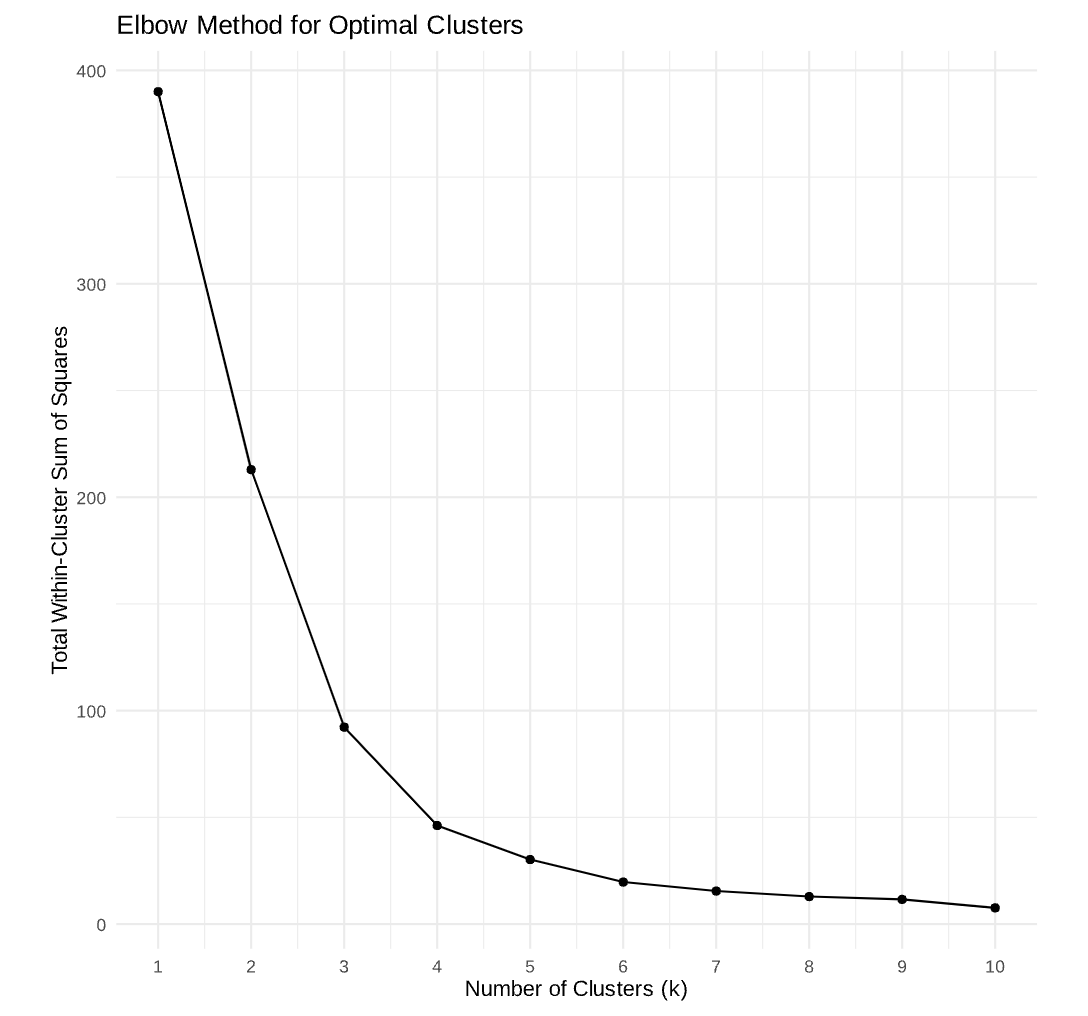

In [6]:
Image("img/elbow.png")

From the above graph, we saw that 5 is the optimal number of clusters we should go with, and so we grouped players into clusters based on shared characteristics, such as age, gender, subscription status, and engagement levels. Clustering helped isolate patterns within the dataset and identify the most engaged group as shown in the graph below.

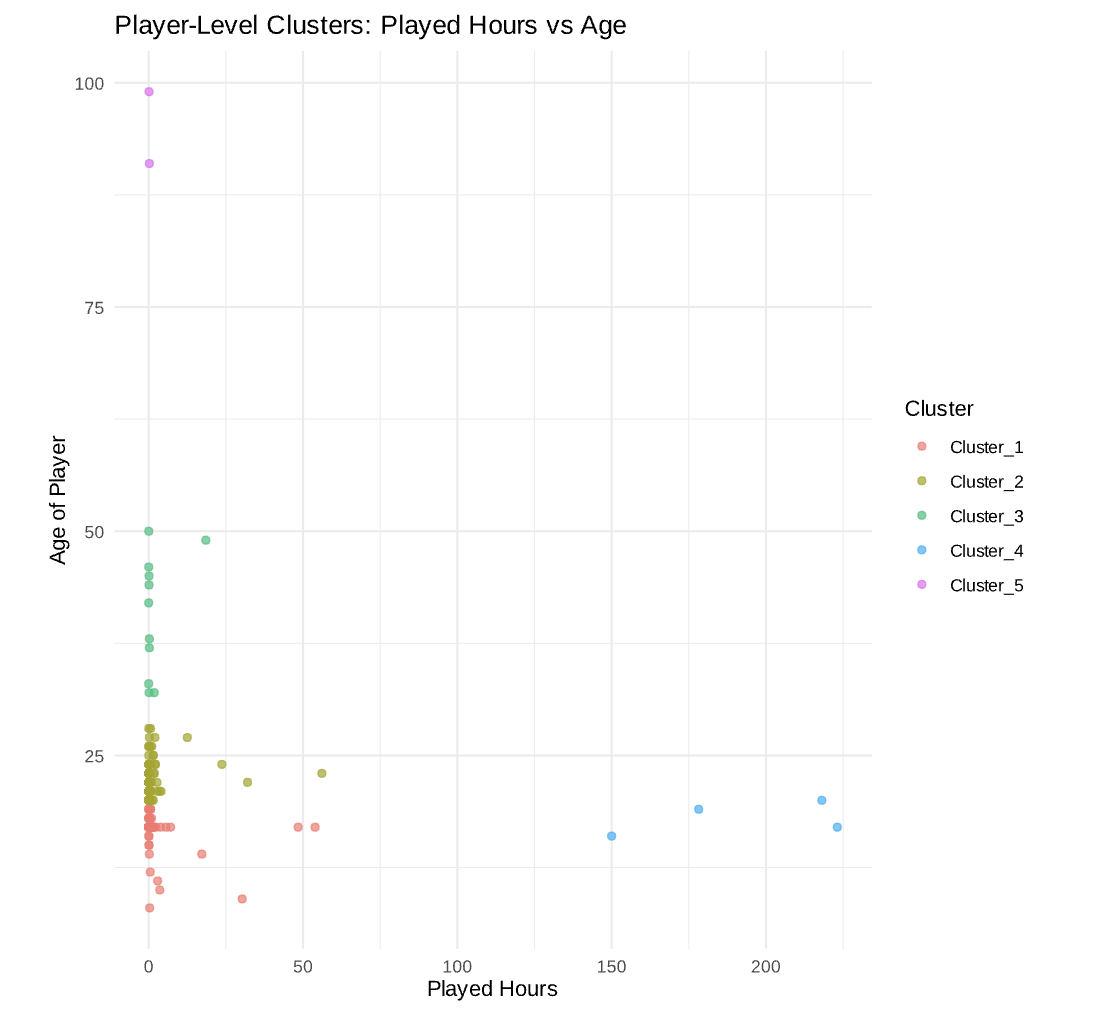

In [7]:
Image("img/clustering.png")

From the graph, we saw that the cluster which had the maximum played hours was termed "Cluster 4." 

#### Description of Results

After running further analysis of Cluster 4, we found that the group consisted of predominantly females as shown in the graph below.

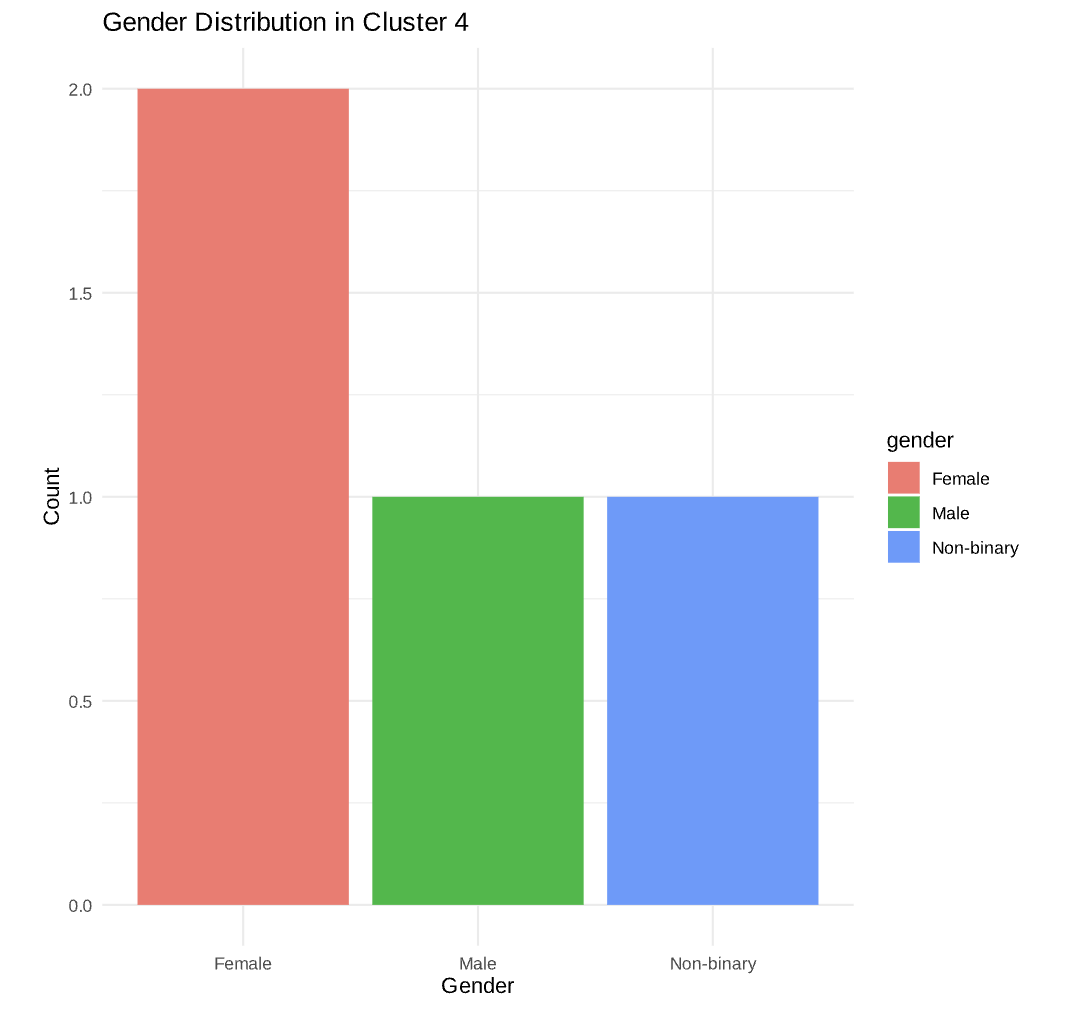

In [8]:
Image("img/demographic.png")


This group exhibited the following key traits:

- Predominantly female.
- Average age of 18 years.
- Consistently subscribed to the game.
- Contributed the most gameplay hours.

In our results, we concluded that: 
- Cluster 4’s high engagement challenged common stereotypes about gaming being male-dominated.
- Subscriptions appeared to create a sense of commitment, fostering long-term gameplay.
- The results aligned well with the original decision-making goal: understanding which players to target for recruitment to maximize engagement and meet the data collection goal.

#### Caveats and Limitations

- Sampling Bias: The dataset may not represent the broader Minecraft player population, especially if underrepresented groups (e.g., older players, non-subscribers) were excluded. This could skew findings toward certain demographics.
- Correlation vs. Causation: While subscriptions strongly correlate with engagement, causation cannot be confirmed. Players might subscribe because they are already engaged, not the other way around.
- Cluster Homogeneity Assumptions: k-means clustering assumes clusters are spherical and evenly distributed, which may oversimplify the dataset's natural complexity. This could lead to misclassification of players into clusters that do not fully capture their unique behaviors.

This analysis provided actionable insights for PLAIcraft but also highlighted areas for improvement and future research, ensuring a balanced understanding of the data and its limitations.

### 2.2 Effective communication technique
rubric={points:4}

Describe one effective communication technique that you used in your post, or an aspect of the post that you are particularly satisfied with. (Max 3 sentences.)

I am satisfied with the analysis we did on the data provided to us, and on the decision to use K-means clustering, rather than k nearest neighbour as we had multiple factors to go through like age, subscription status, gaming expertise etc. 
Eventually we decided that the best metric to target was what kinds of people were the ones who logged in the most played hours. From there the analysis became simpler, as that helped us to narrow down the clusters, and then once we found the cluster, we looked into it to see what the patterns of the demographic, age and subscription status of the players were. 

### (optional, not for marks) 2.3

Publish your blog post from 1.1 publicly using a tool like [Quarto](https://quarto.org/), or somewhere like medium.com, and paste a link here. Be sure to pick a tool in which code and code output look reasonable. This link could be a useful line on your resume!

<br><br><br><br>

## Exercise 3: Your takeaway from the course 
rubric={points:2}

**Your tasks:**

- Reflect on your journey through this course. Please identify and elaborate on at least three key concepts or experiences where you had an "aha" moment. How would you use the concepts learned in this course in your personal projects or how would you approach your past projects differently based on the insights gained in this course? We encourage you to dig deep and share your genuine reflections.

> Please write thoughtful answers. We are looking forward to reading them 🙂. 

I really enjoyed this course—it’s actually one of my last before graduation (fingers crossed!). I was also taking DSCI 100 (in R) at the same time, and there were definitely some overlapping concepts between the two. Honestly, some of my biggest "aha" moments came from seeing how things I learned in this course applied directly to the DSCI project.

One big moment for me was realizing the importance of not filtering out so-called "bad" data. During our DSCI project, I kept reminding my teammates that leaving that data in could actually give us more accurate and stratified results. That was a cool connection to make, and it really changed how I thought about data cleaning.

Another moment was when we got into debates about using k-means clustering—whether it was the right choice and what the trade-offs were. Those discussions made me realize how important it is to really understand the tools you’re using and not just pick something because it’s familiar.

Finally, figuring out whether to approach a problem with classification or regression was another lightbulb moment. It made me appreciate how different methods lead to different insights, and I definitely feel more confident about making those decisions now.

Looking back, this course taught me a lot about how to approach projects differently. I’ll definitely carry these lessons into future projects—like doing a better job with exploratory data analysis, thinking more critically about algorithm choices, and not being so quick to clean or discard data. It’s been a great learning experience, and I’m excited to keep building on it.

<br><br><br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.** 

### Congratulations 👏👏

That's all for the assignments! Congratulations on finishing all homework assignments! 

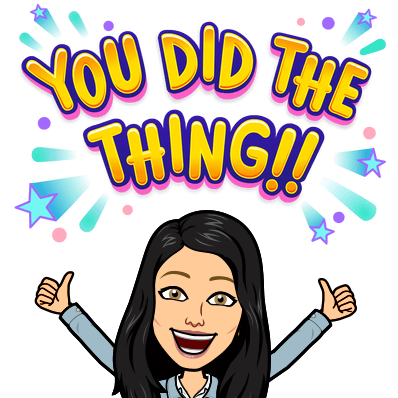

In [9]:
from IPython.display import Image

Image("img/eva-congrats.png")